In [36]:
from matplotlib import gridspec
import matplotlib.pyplot as plt  
import numpy as np
import xarray as xr
import cartopy.crs as ccrs # for maps     
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import string # for subplot annotation
from matplotlib import ticker


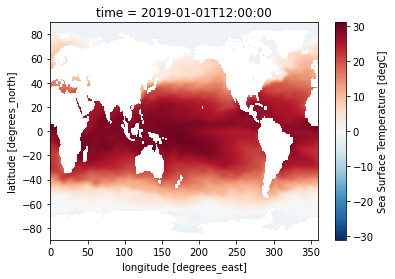

In [9]:
tos = xr.open_dataset('/g/data/e14/mv7494/'+'tos_for_land_sea_mask_remapbil.nc').tos[0,:,:]
tos.plot()

In [22]:
def fancy_plot(axes_nr):
    axes_nr.coastlines(resolution = '50m') # add coast lines
    lon_formatter = cticker.LongitudeFormatter();
    lat_formatter = cticker.LatitudeFormatter()
    axes_nr.xaxis.set_major_formatter(lon_formatter) # set format of x-axis
    axes_nr.yaxis.set_major_formatter(lat_formatter) # "       "       "
    axes_nr.xaxis.label.set_visible(False) # no axis labels
    axes_nr.yaxis.label.set_visible(False)
    axes_nr.tick_params(axis='both', which='major', labelsize=16) # fontsize of lon/lat labels
    
    axes_nr.add_feature(cfeature.LAND, edgecolor = 'black', facecolor = [.83,.83,.83], zorder = 2)

    plt.title(subtitel, fontsize=16)

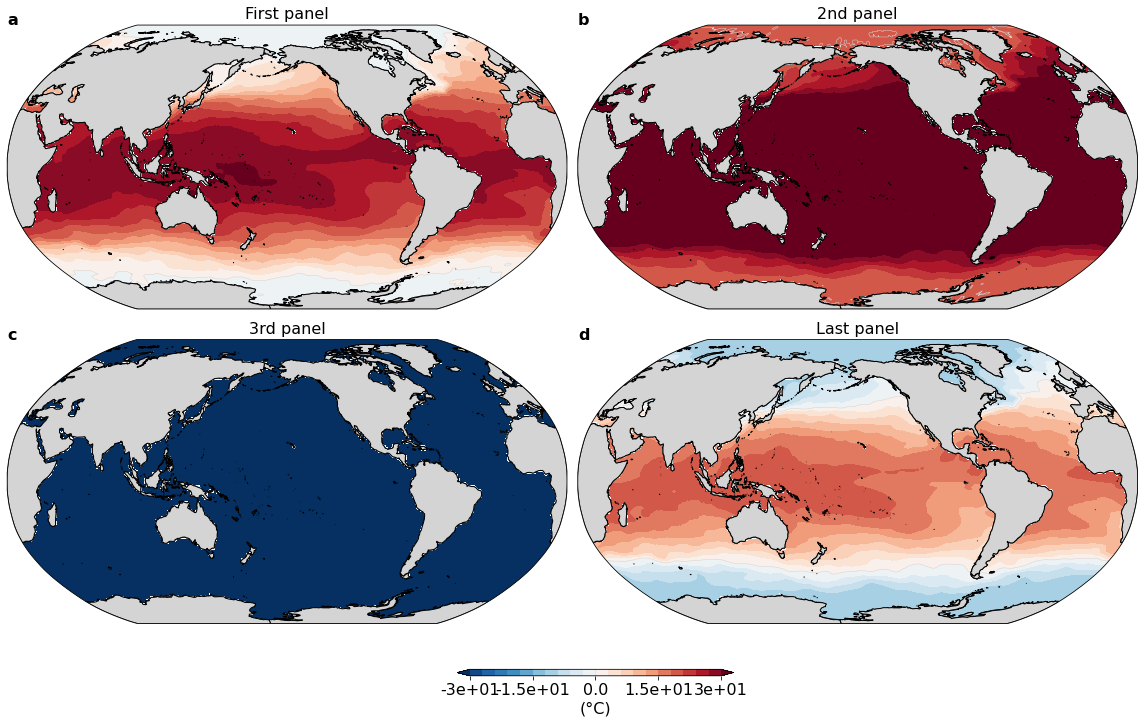

In [41]:
# initialise figure
fig = plt.figure(figsize=(16,9),tight_layout=True,facecolor='w',edgecolor='k')
gs = gridspec.GridSpec(2, 2, width_ratios = [1,1])

for f in range(4):
    if f == 0: panel = gs[0,0]; data = tos;     subtitel = 'First panel'
    if f == 1: panel = gs[0,1]; data = tos+20;  subtitel = '2nd panel'
    if f == 2: panel = gs[1,0]; data = tos-999; subtitel = '3rd panel'
    if f == 3: panel = gs[1,1]; data = tos-10;  subtitel = 'Last panel'
    
    ax1 = plt.subplot(panel, projection=ccrs.Robinson(central_longitude=200)) # longitude starting at Cape Agulhas (20°E)
    ticks = np.linspace(-30,30,21)      
    # here is where I actually plot the data ------------------------------------------------------------------------------------------------------- #                    
    p1  = data.plot.contourf(ax=ax1, levels = ticks, cmp='RdBu_r',add_colorbar=False,extend='both',transform=ccrs.PlateCarree())
    p11 = data.plot.contour(levels = [0], linewidths=.5, cmap='#d4d4d4', transform=ccrs.PlateCarree()) #d4d4d4 = lightgrey = [.83, .83, .83] in HEX
    # ---------------------------------------------------------------------------------------------------------------------------------------------- #                    

    fancy_plot(ax1)
    
    ax1.text(0, 1, string.ascii_lowercase[f], transform=ax1.transAxes, size=16, weight='bold') # bold letter a at the top

    # adding a colour bar
    if f == 0:
        cax = fig.add_axes([.4, -.05, .24, .01]) # position: [x0, y0, width, height]
        from matplotlib.ticker import FuncFormatter
        fmt = lambda x, pos: '{:.2}'.format(x)                              # format tick labels so that I have (-.5, -.25,0,.25,.5)
        cb = plt.colorbar(p1, cax = cax, shrink=.5, orientation='horizontal', format=FuncFormatter(fmt)); 
        cb_txt = cb.set_label(label='(°C)', size=16)
        cb.ax.tick_params(labelsize=16); tick_locator = ticker.MaxNLocator(nbins=4)
        cb.locator = tick_locator;cb.update_ticks()
        cb.add_lines(p11) # add contours to colour bar  